## DATA PRE-PROCESSING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')

import nltk

In [2]:
try:
    df = pd.read_csv('12GEN.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('12GEN.csv', encoding='ISO-8859-1')
print(df.shape)

(1033, 6)


In [3]:
df.head(500)

,ID,Name,Stars,Title,Date,Description
0,1.0,William Hong,1,1.0 out of 5 stars\nVery dirty and used. I did...,11-04-2024,Packing already open. CPU in protect case not ...
1,2.0,Amere,1,1.0 out of 5 stars\nTerrible customer service,29-04-2024,I returned the item because it wasnt good nor ...
2,3.0,nascanio,1,1.0 out of 5 stars\nSCAM,22-03-2024,"CPU is bad and used, Today open the box. the c..."
3,4.0,Average consumer,1,1.0 out of 5 stars\nDead on arrival,15-06-2023,After troubleshooting with q-led lights i dedu...
4,5.0,Jason Krawczak,1,1.0 out of 5 stars\nIntel good Amazon bad.,11-05-2024,Amazon sent a broken item to me.
...,...,...,...,...,...,...
495,496.0,Carlos Gonzalez Debia,5,5.0 out of 5 stars\nAparentemente es un buen p...,08-12-2023,Este producto fue comprado en base a la inform...
496,497.0,Tyler S,5,"5.0 out of 5 stars\nGreat buy, when on sale",01-03-2024,This is a great processor and when on sale it ...
497,498.0,Dylan,5,5.0 out of 5 stars\nGreat Performance,14-11-2023,Built a new system with the 14700k for photo/v...
498,499.0,Amazon Customer,5,5.0 out of 5 stars\n20 modern cores per $400,24-01-2024,I bought it to do computations on all cores. T...


In [4]:
print(df.shape)

(1033, 6)


DATA PREPROCESSING

In [5]:
# Downsampling data to only 500 rows
def to_lower(text):
    try:
        return str(text).lower()
    except AttributeError:
        return text

In [6]:
df['Description'] = df['Description'].apply(to_lower)

In [7]:
print(df[['Description']].head())

                                         Description
0  packing already open. cpu in protect case not ...
1  i returned the item because it wasnt good nor ...
2  cpu is bad and used, today open the box. the c...
3  after troubleshooting with q-led lights i dedu...
4                   amazon sent a broken item to me.


In [8]:
df = df.sample(500, random_state=42)
print(df.shape)

(500, 6)


In [9]:
#REMOVING DUPLICATE ELEMENTS

duplicate_rows = df[df.duplicated()]
df = df.drop_duplicates()

In [10]:
df['Description'].fillna('', inplace=True)
df['Desc_length'] = df['Description'].apply(len)

In [11]:
df.head()

,ID,Name,Stars,Title,Date,Description,Desc_length
294,295.0,KimyChalula,5,5.0 out of 5 stars\nBuen producto,27-02-2024,por el momento me funciona perfectamente para ...,165
453,454.0,Amazon Customer,4,4.0 out of 5 stars\nIt's a hot one,05-12-2023,i had to replace my h60 to get this to run a f...,324
636,637.0,Manu,5,Puissance...,NaN,"super processeur, trã¨s puissant, ne chauffe p...",173
139,140.0,Ashutosh Aswal,1,1.0 out of 5 stars\nGood Cpu but awful Delivery,NaN,the processor is good & works fine. but the de...,257
538,539.0,Thom,5,5.0 out of 5 stars\nHot,22-03-2024,runs hot but runs very well needs a good good ...,57


## Exploratory Data Analysis

<AxesSubplot:title={'center':'Count of reviews by Stars'}>

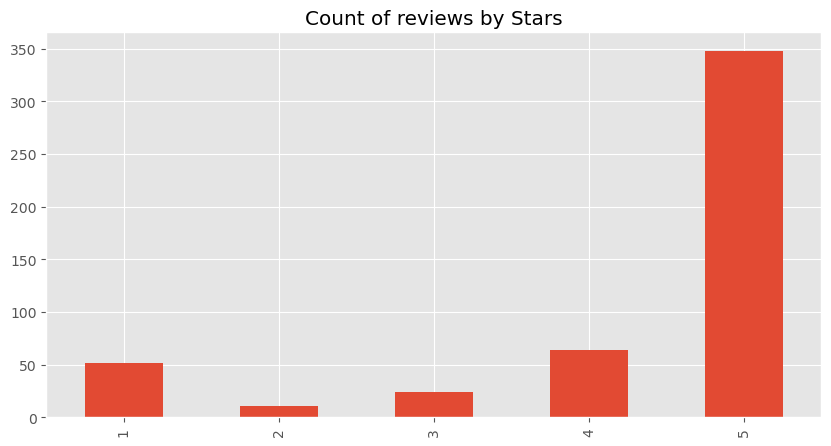

In [12]:
df['Stars'].value_counts().sort_index().plot(kind='bar', title='Count of reviews by Stars', figsize=(10, 5))

## Basic NLTK

In [13]:
example = df['Description'][350]
print(example)

excelente procesador cumple con las expectativas


In [14]:
# Tokenize the review
tokens = nltk.word_tokenize(example)
tokens[:10]

['excelente', 'procesador', 'cumple', 'con', 'las', 'expectativas']

In [15]:
# Get part of speech tags
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('excelente', 'JJ'),
 ('procesador', 'NN'),
 ('cumple', 'NN'),
 ('con', 'NN'),
 ('las', 'NNS'),
 ('expectativas', 'VBP')]

In [16]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  excelente/JJ
  procesador/NN
  cumple/NN
  con/NN
  las/NNS
  expectativas/VBP)


## VADER Sentiment Scoring - bag of words approach

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [18]:
# Testing model
sia.polarity_scores('I am very happy with the product!')

{'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.6468}

In [19]:
sia.polarity_scores('The product is very bad')

{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'compound': -0.5849}

In [20]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [21]:
nltk.download('vader_lexicon')
nltk.download('omw-1.4')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kirth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kirth\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
#lets's train our own model
def vader_polarity(text):
    """ Transform the output to a binary 0/1 result """
    score = vader.polarity_scores(text)
    total_positive_score = score['pos']
    total_negative_score = score['neg']
    total_neutral_score = score['neu']
    compound_score = score['compound']
    
    if (total_neutral_score > 1 and total_positive_score > total_negative_score and total_positive_score >= total_neutral_score):
        sentiment = 'Positive'
    elif (total_neutral_score > 1 and total_negative_score > total_positive_score and total_negative_score >= total_neutral_score):
        sentiment = 'Negative'
    elif (total_neutral_score > 1 and total_neutral_score > total_positive_score and total_neutral_score > total_negative_score):
        sentiment = 'Neutral'
    elif (total_neutral_score > 1 and total_negative_score == total_positive_score and total_negative_score >= total_neutral_score):
        sentiment = 'Neutral'
    elif (total_neutral_score <= 1 and total_positive_score == total_negative_score and total_positive_score == total_neutral_score):
        sentiment = "Neutral"
    elif (total_neutral_score <= 1 and total_positive_score > total_negative_score):
        sentiment = "Positive"
    elif (total_neutral_score <= 1 and total_negative_score > total_positive_score):
        sentiment = "Negative"
    else:
        if score['compound'] >= 0.5:
            sentiment = 'Positive'
        elif score['compound'] > -0.5 and score['compound'] < 0.5:
            sentiment = 'Neutral'
        elif score['compound'] <= -0.5:
            sentiment = 'Negative'
    return sentiment

In [23]:
vader_polarity("I am very happy with the product!")

'Positive'

In [24]:
vader_polarity("The product is very bad")

'Negative'

In [25]:
try:
    data = pd.read_csv('12GEN.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('12GEN.csv', encoding='ISO-8859-1')
texts = data

In [26]:
for index, review in texts['Description'].astype(str).iteritems():
    sentiment = vader_polarity(review)
    print(f"Review {index}: {sentiment}")


Review 0: Positive
Review 1: Negative
Review 2: Negative
Review 3: Positive
Review 4: Negative
Review 5: Positive
Review 6: Negative
Review 7: Negative
Review 8: Positive
Review 9: Negative
Review 10: Positive
Review 11: Neutral
Review 12: Negative
Review 13: Neutral
Review 14: Neutral
Review 15: Neutral
Review 16: Positive
Review 17: Negative
Review 18: Positive
Review 19: Positive
Review 20: Positive
Review 21: Positive
Review 22: Positive
Review 23: Negative
Review 24: Positive
Review 25: Positive
Review 26: Positive
Review 27: Positive
Review 28: Neutral
Review 29: Neutral
Review 30: Positive
Review 31: Neutral
Review 32: Neutral
Review 33: Negative
Review 34: Neutral
Review 35: Negative
Review 36: Positive
Review 37: Positive
Review 38: Positive
Review 39: Positive
Review 40: Neutral
Review 41: Neutral
Review 42: Positive
Review 43: Neutral
Review 44: Positive
Review 45: Negative
Review 46: Positive
Review 47: Neutral
Review 48: Positive
Review 49: Positive
Review 50: Positive
Rev

In [27]:
def vader_polarity(text):
    """ Determine sentiment using VADER """
    
    score = vader.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    
positive_count = 0
negative_count = 0
neutral_count = 0

for index, review in texts['Description'].astype(str).iteritems():
    sentiment = vader_polarity(review)
    if sentiment == 'Positive':
        positive_count += 1
    elif sentiment == 'Negative':
        negative_count += 1
    elif sentiment == 'Neutral':
        neutral_count += 1

In [28]:
print(f"Positive Sentiments: {positive_count}")
print(f"Negative Sentiments: {negative_count}")
print(f"Neutral Sentiments: {neutral_count}")

Positive Sentiments: 572
Negative Sentiments: 195
Neutral Sentiments: 266


## Plotting VADER results

In [29]:
df['Description'] = df['Description'].astype(str).fillna('')

In [30]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Description']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [31]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [32]:
vaders.head(50)

,ID,neg,neu,pos,compound,Name,Stars,Title,Date,Description,Desc_length
0,295.0,0.071,0.929,0.000,-0.2960,KimyChalula,5,5.0 out of 5 stars\nBuen producto,27-02-2024,por el momento me funciona perfectamente para ...,165
1,454.0,0.035,0.965,0.000,-0.2960,Amazon Customer,4,4.0 out of 5 stars\nIt's a hot one,05-12-2023,i had to replace my h60 to get this to run a f...,324
2,637.0,0.000,0.878,0.122,0.5994,Manu,5,Puissance...,NaN,"super processeur, trã¨s puissant, ne chauffe p...",173
3,140.0,0.139,0.581,0.279,0.7351,Ashutosh Aswal,1,1.0 out of 5 stars\nGood Cpu but awful Delivery,NaN,the processor is good & works fine. but the de...,257
4,539.0,0.000,0.307,0.693,0.9503,Thom,5,5.0 out of 5 stars\nHot,22-03-2024,runs hot but runs very well needs a good good ...,57
5,366.0,0.102,0.898,0.000,-0.3595,Gustavo,5,5.0 out of 5 stars\nExcelente Calidad - Precio,06-10-2022,llevo un poco mã¡s de 4 meses con este cpu y n...,139
6,604.0,0.053,0.817,0.130,0.9132,Sai,4,Money Value is there but 13600k is better,NaN,it's pretty good value for money (as far as in...,846
7,583.0,0.000,1.000,0.000,0.0000,BAI,3,l'emballage a Ã©tÃ© ouvert,NaN,le processeur et le ventilateur ont l'air neuf...,287
8,232.0,0.000,0.858,0.142,0.3595,Julien,5,Rapport qualitÃ© prix performance extra !,NaN,pour le petit prix du i3-12100f juste parfait ...,109
9,211.0,0.000,1.000,0.000,0.0000,Manuel,5,I3 con le p*lle quadrate,NaN,"sorprendente i3, poca spesa e tanta resa. ho a...",364


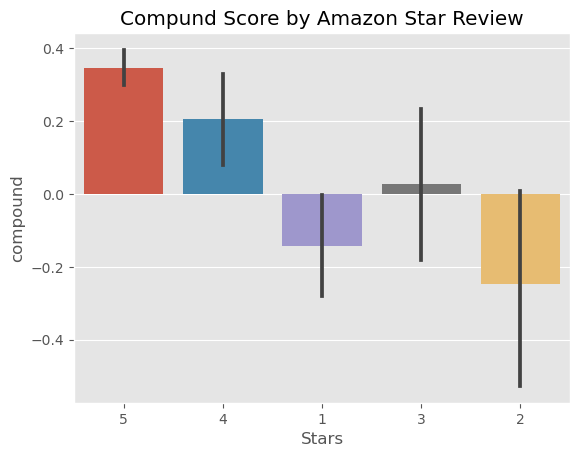

In [33]:
ax = sns.barplot(data=vaders, x='Stars', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

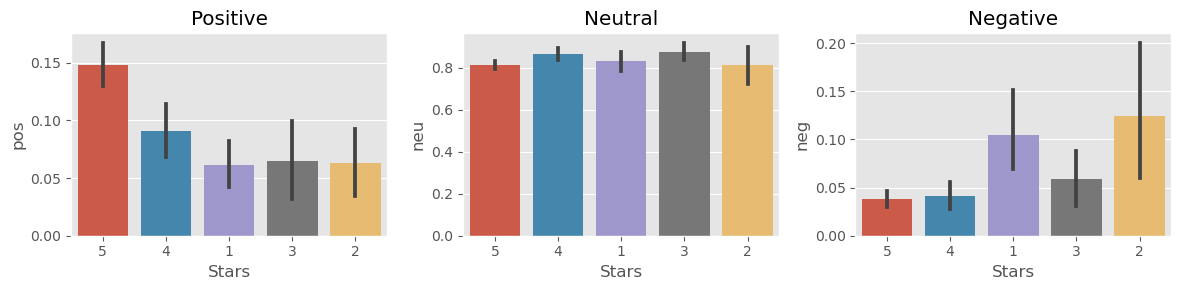

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Stars', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [35]:
df['Description'] = df['Description'].astype(str).fillna('')

In [36]:
df['vader_scores'] = df['Description'].apply(lambda text: sia.polarity_scores(text)['compound'])

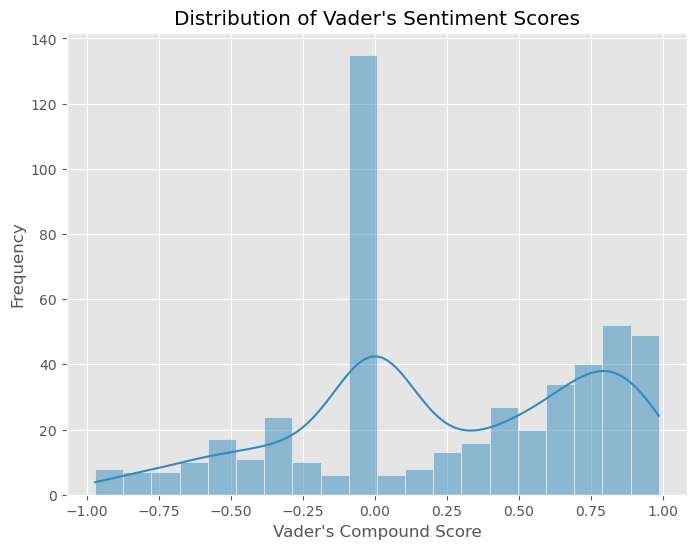

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['vader_scores'], bins=20, kde=True)
plt.title("Distribution of Vader's Sentiment Scores")
plt.xlabel("Vader's Compound Score")
plt.ylabel("Frequency")
plt.show()

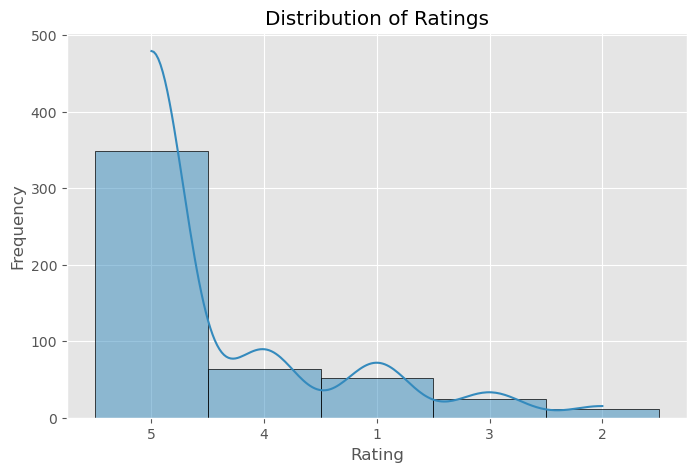

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8,5))
sns.histplot(df['Stars'], bins=10, kde=True,edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [39]:
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')
df = df.dropna(subset=['Stars'])


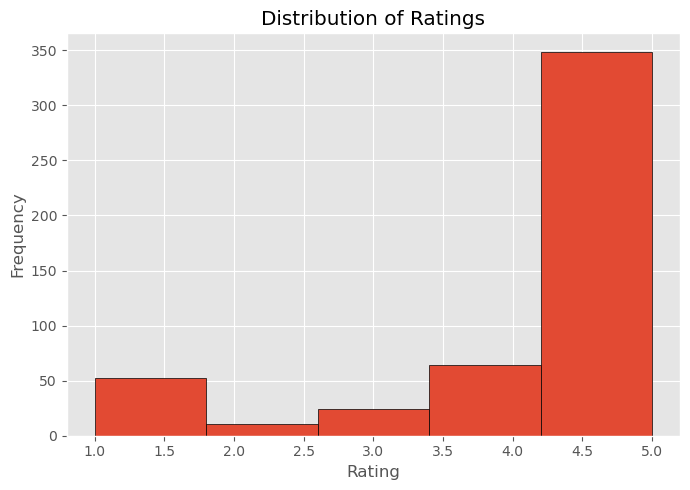

In [40]:
plt.figure(figsize=(7,5))
plt.hist(df['Stars'], bins=5,edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.tight_layout()
plt.show()